In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/home/vignesh-nadar/Desktop/sixtyDays/sprint2/python_data_analytics/data/WalmartSalesData.csv')

In [43]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46:00,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16:00,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22:00,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33:00,Cash,65.82,4.761905,3.2910,4.1


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

## Feature Engineering

In [45]:
# Convert date and time to datetime objects
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

# Add new columns for weekday and hour
df['weekday'] = df['Date'].dt.day_name()
df['hour'] = df['Time']

## Product

### 1. How many unique product lines does the data have?

In [46]:
print(f'There are {len(df['Product line'].unique())} unique product lines, those are: {df['Product line'].unique()}')

There are 6 unique product lines, those are: ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']


### 2. What is the most common payment method?

In [47]:
print(f'The most common payment method is {df['Payment'].unique().max()} with a total of {df['Payment'].value_counts()[0]} transaction.')

The most common payment method is Ewallet with a total of 345 transaction.


### 3. What is the most selling product line?

In [48]:
x = df.groupby('Product line')['Product line'].count()
#df['Product line'].unique().max()
#print(x)
print(f'The product line with most selling products is {df.groupby('Product line')['Product line'].count().sort_values(ascending=False).idxmax()} and the number of items sold in that category is {df.groupby('Product line')['Product line'].count().max()}.')

The product line with most selling products is Fashion accessories and the number of items sold in that category is 178.


<Axes: xlabel='Product line'>

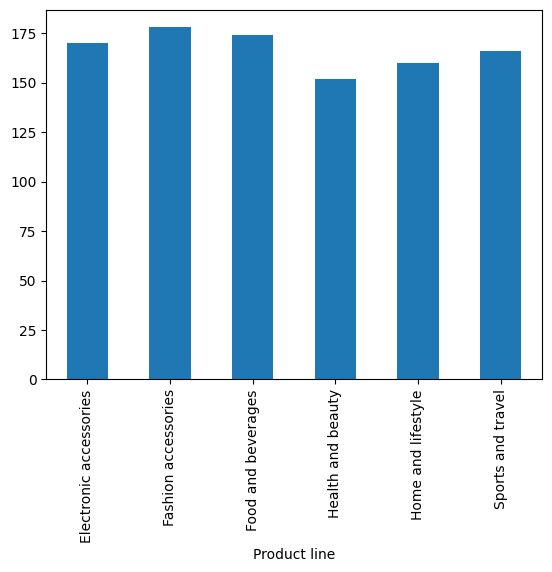

In [49]:
x.plot(kind= 'bar')

### 4. What is the total revenue by month?

In [50]:
df['Date'] = pd.to_datetime(df['Date'])
df['month'] = df['Date'].dt.month_name()
df['month'].unique()
x = df.groupby('month')['cogs'].sum().sort_values(ascending=False)

print('Total revenue by month (highest to lowest):\n',df.groupby('month')['cogs'].sum().sort_values(ascending=False))

Total revenue by month (highest to lowest):
 month
January     110754.16
March       104243.34
February     92589.88
Name: cogs, dtype: float64


<Axes: xlabel='month'>

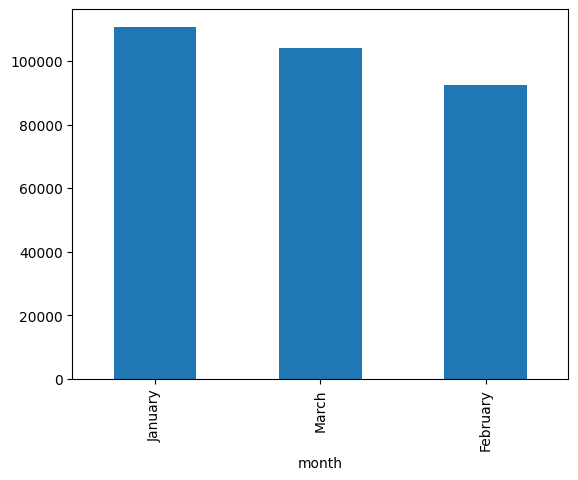

In [51]:
x.plot(kind= 'bar')

### 5. What month had the largest COGS?

In [52]:
print('Months and their respective COGS (highest to lowest):\n',df.groupby('month')['cogs'].sum().sort_values(ascending=False))

Months and their respective COGS (highest to lowest):
 month
January     110754.16
March       104243.34
February     92589.88
Name: cogs, dtype: float64


<Axes: xlabel='month'>

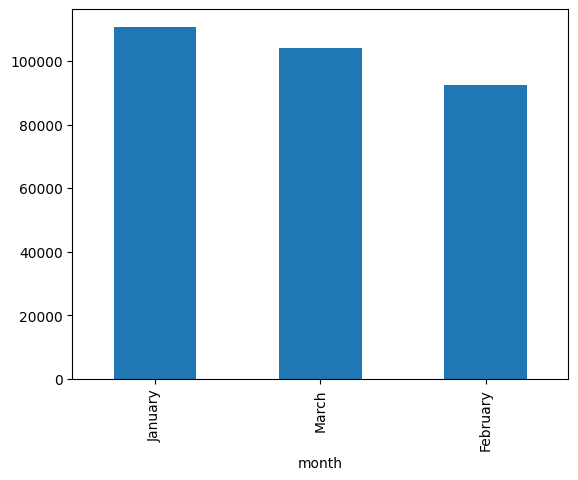

In [53]:
x = df.groupby('month')['cogs'].sum().sort_values(ascending=False)
x.plot(kind= "bar")

### 6. What product line had the largest revenue?

In [54]:
print(f'The {df.groupby('Product line')['Total'].sum().sort_values(ascending=False).idxmax()} category had the largest revenue.')

The Food and beverages category had the largest revenue.


<Axes: xlabel='Product line'>

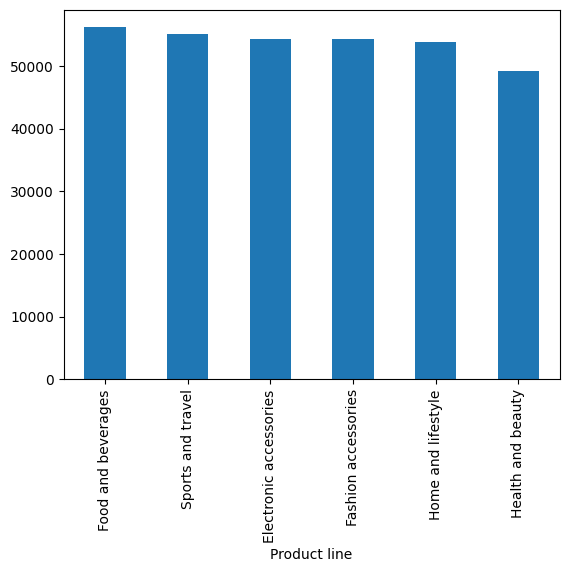

In [55]:
x = df.groupby('Product line')['Total'].sum().sort_values(ascending=False)
x.plot(kind= 'bar')

### 7. What is the city with the largest revenue?

In [56]:
print(f'{df.groupby('City')['Total'].sum().sort_values(ascending=False).idxmax()} has the largest revenue.')

Naypyitaw has the largest revenue.


<Axes: xlabel='City'>

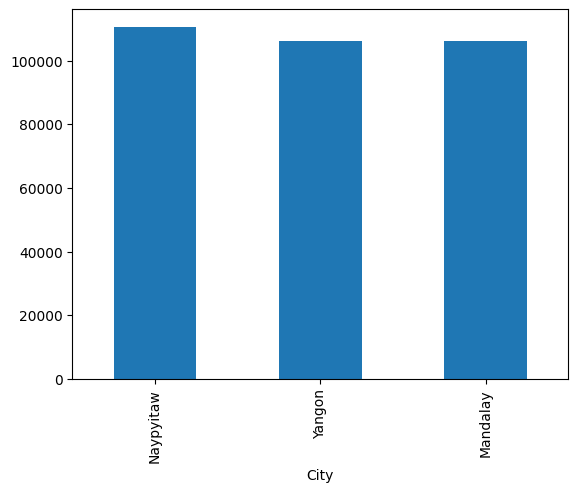

In [57]:
x = df.groupby('City')['Total'].sum().sort_values(ascending=False)
x.plot(kind= 'bar')

### 8. What product line had the largest VAT?

In [58]:
print(df.groupby('Product line')['Tax 5%'].sum().sort_values(ascending=False))

Product line
Food and beverages        2673.5640
Sports and travel         2624.8965
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Home and lifestyle        2564.8530
Health and beauty         2342.5590
Name: Tax 5%, dtype: float64


<Axes: xlabel='Product line', ylabel='VAT'>

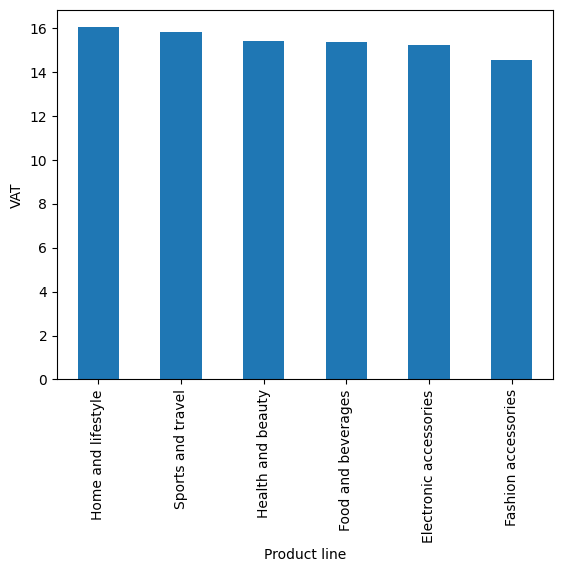

In [59]:
x = df.groupby('Product line')['Tax 5%'].mean().sort_values(ascending=False)
x.plot(kind= 'bar', ylabel= 'VAT')

### 9. Fetch each product line and add a column to those product line showing "Good", "Bad". Good if its greater than average sales

In [60]:
average_sales = df['Total'].mean()
product_sales = df.groupby('Product line')['Total'].mean().reset_index()
product_sales['Performance'] = np.where(product_sales['Total'] > average_sales, 'Good', 'Bad')

df = df.merge(product_sales[['Product line', 'Performance']], on='Product line', how='left')
print(product_sales)

             Product line       Total Performance
0  Electronic accessories  319.632538         Bad
1     Fashion accessories  305.089298         Bad
2      Food and beverages  322.671517         Bad
3       Health and beauty  323.643020        Good
4      Home and lifestyle  336.636956        Good
5       Sports and travel  332.065220        Good


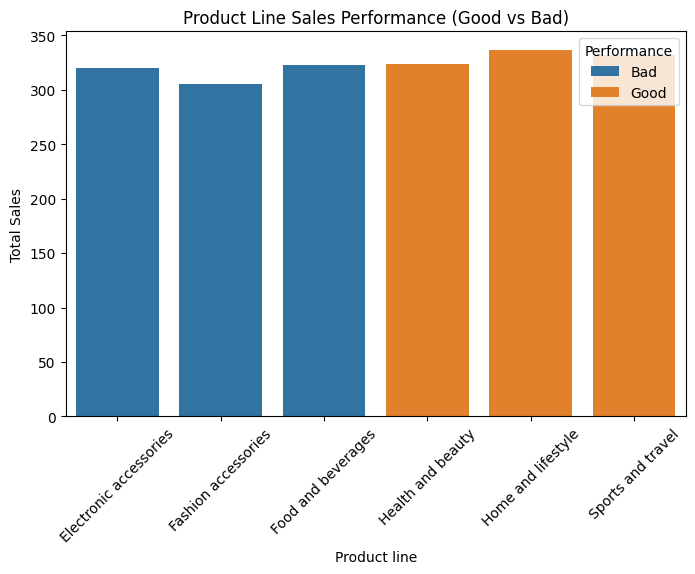

In [61]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Product line', y='Total', hue='Performance', data=product_sales)
plt.title('Product Line Sales Performance (Good vs Bad)')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [62]:
# prf = pd.Series(df.groupby('Product line')['Total'].mean().sort_values(ascending=False))
# Total_rev = df['Total'].mean()
# for i in range(0, len(df['Product line'].unique())):
#     if prf[i] > Total_rev:
#         prf[i] = "Good"
#     else:
#         prf[i] = "Bad"
# print(prf)

### 10. Which branch sold more products than average product sold?

In [63]:
#print(f'Branch {df.groupby('Branch')['Quantity'].mean().sort_values(ascending= False).idxmax()} sold {df.groupby('Branch')['Quantity'].mean().sort_values(ascending= False).max()} more than the average product sold which is {df['Quantity'].mean()}')

avg_quantity_per_branch = df.groupby('Branch')['Quantity'].mean().sort_values(ascending=False)
overall_avg_quantity = df['Quantity'].mean()

top_branch = avg_quantity_per_branch.idxmax()
top_branch_avg_quantity = avg_quantity_per_branch.max()

print(f'Branch {top_branch} sold {top_branch_avg_quantity} products on average, which is more than the overall average product sold: {overall_avg_quantity:.2f}')


Branch C sold 5.5823170731707314 products on average, which is more than the overall average product sold: 5.51


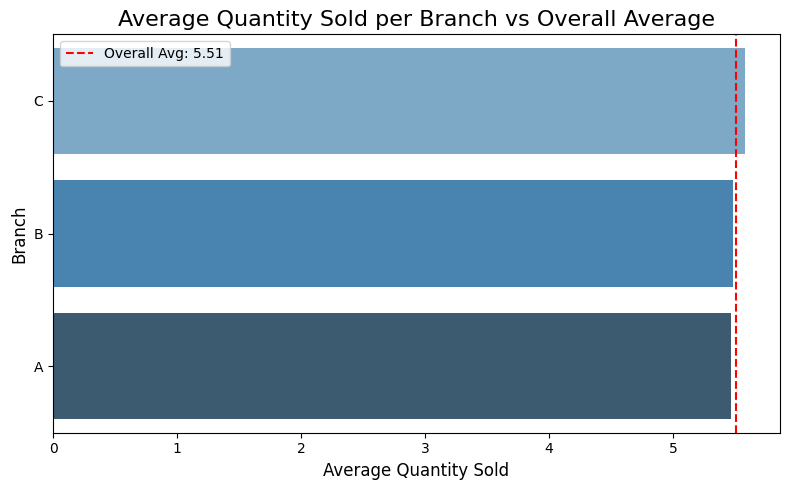

In [64]:
plt.figure(figsize=(8, 5))

sns.barplot(x=avg_quantity_per_branch, y=avg_quantity_per_branch.index, palette='Blues_d')
plt.axvline(overall_avg_quantity, color='red', linestyle='--', label=f'Overall Avg: {overall_avg_quantity:.2f}')

plt.title('Average Quantity Sold per Branch vs Overall Average', fontsize=16)
plt.xlabel('Average Quantity Sold', fontsize=12)
plt.ylabel('Branch', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


### 11. What is the most common product line by gender? HELP

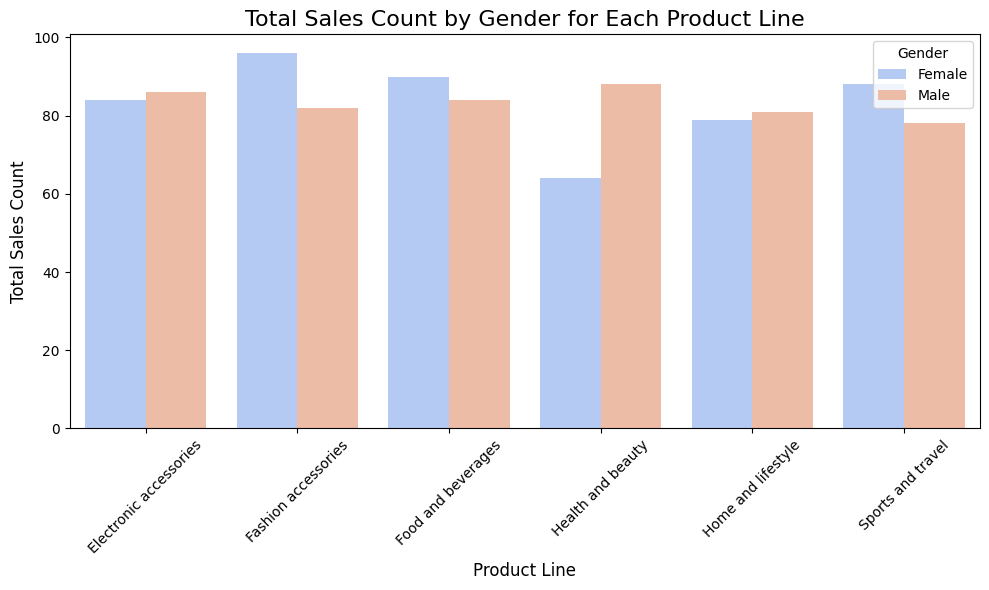

In [65]:
x = df.groupby(['Gender', 'Product line']).agg(Total_count=('Total', 'count')).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Product line', y='Total_count', hue='Gender', data=x, palette='coolwarm')

plt.title('Total Sales Count by Gender for Each Product Line', fontsize=16)
plt.xlabel('Product Line', fontsize=12)
plt.ylabel('Total Sales Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Gender')

plt.tight_layout()
plt.show()

### 12. What is the average rating of each product line?

In [66]:
print(f'The average rating of {df.groupby('Product line')['Rating'].mean().sort_values(ascending= False)}')

The average rating of Product line
Food and beverages        7.113218
Fashion accessories       7.029213
Health and beauty         7.003289
Electronic accessories    6.924706
Sports and travel         6.916265
Home and lifestyle        6.837500
Name: Rating, dtype: float64


<Axes: xlabel='Product line'>

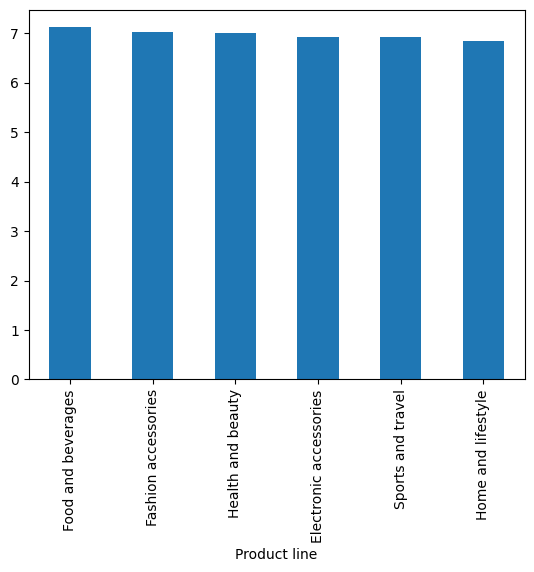

In [67]:
x = df.groupby('Product line')['Rating'].mean().sort_values(ascending= False)
x.plot(kind= 'bar')

## Sales

### 1. Number of sales made in each time of the day per weekday

In [68]:
sales_by_time = df.groupby(['weekday', 'hour']).size().reset_index(name='sales')
sales_pivot = sales_by_time.pivot(index="hour", columns="weekday", values="sales")
print(sales_pivot)

weekday  Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
hour                                                                   
10           18      12        16      11        18       16         10
11           11       9        12      11        15       20         12
12           10      14        18      11        11       11         14
13           16      10        14      18        12       13         20
14           14       6        11      13        14       15         10
15           18      18        12      11        12       14         17
16           10      16        14       6        12        9         10
17            6      11        12      11        15        9         10
18           11      11        18      15         9       12         17
19           13       8        23      17        10       28         14
20           12      10        14       9        10       11          9


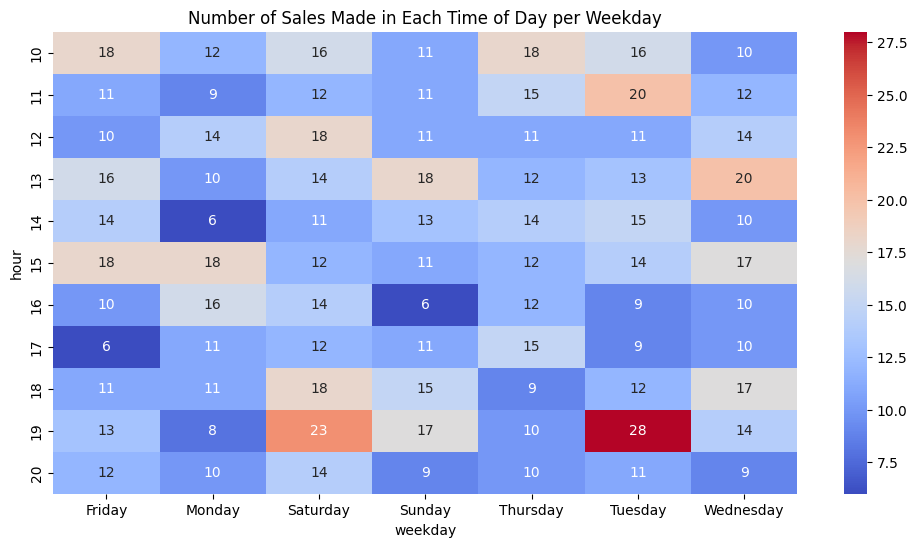

In [69]:
# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(sales_pivot, cmap='coolwarm', annot=True, fmt='d')
plt.title('Number of Sales Made in Each Time of Day per Weekday')
plt.show()

### 2. Which of the customer types brings the most revenue?

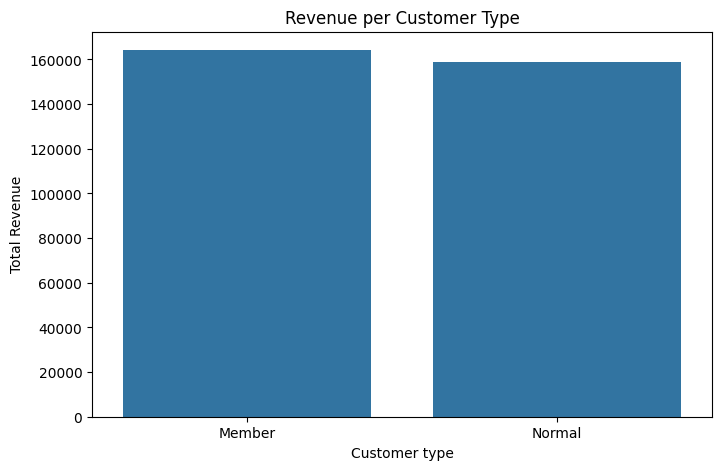

In [70]:
# Group by customer type and sum the total column to find revenue
revenue_per_customer_type = df.groupby('Customer type')['Total'].sum().reset_index()

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='Customer type', y='Total', data=revenue_per_customer_type)
plt.title('Revenue per Customer Type')
plt.ylabel('Total Revenue')
plt.show()

### 3. Which city has the largest tax percent/ VAT (**Value Added Tax**)?

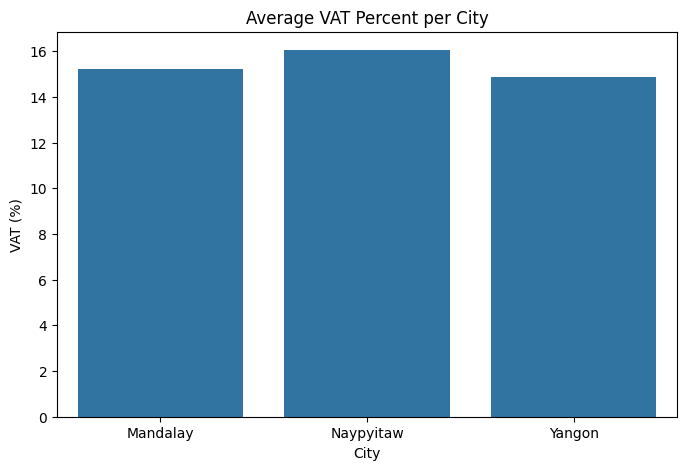

In [71]:
# Group by city and calculate the sum of VAT
vat_per_city = df.groupby('City')['Tax 5%'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='City', y='Tax 5%', data=vat_per_city)
plt.title('Average VAT Percent per City')
plt.ylabel('VAT (%)')
plt.show()


### 4. Which customer type pays the most in VAT?

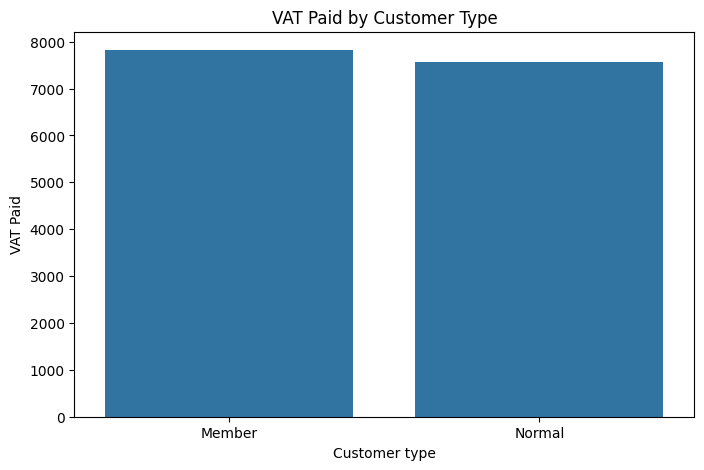

In [72]:
# Group by customer type and sum the VAT column
vat_per_customer_type = df.groupby('Customer type')['Tax 5%'].sum().reset_index()

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='Customer type', y='Tax 5%', data=vat_per_customer_type)
plt.title('VAT Paid by Customer Type')
plt.ylabel('VAT Paid')
plt.show()


## Customer

### 1. How many unique customer types does the data have?

In [73]:
unique_customer_types = df['Customer type'].nunique()
print(f"Unique customer types: {unique_customer_types}")


Unique customer types: 2


### 2. How many unique payment methods does the data have?

In [74]:
unique_payment_methods = df['Payment'].nunique()
print(f"Unique payment methods: {unique_payment_methods}")

Unique payment methods: 3


### 3. What is the most common customer type?

In [75]:
most_common_customer_type = df['Customer type'].mode()[0]
print(f"Most common customer type: {most_common_customer_type}")

Most common customer type: Member


### 4. Which customer type buys the most?

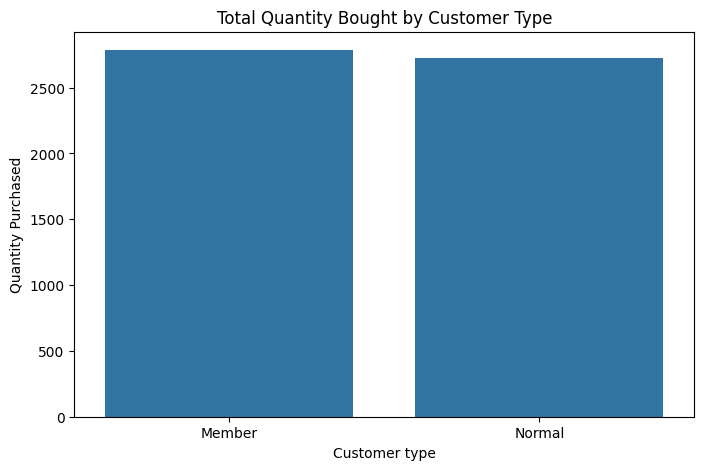

In [76]:
# Group by customer type and sum the quantity column
total_purchases_per_customer_type = df.groupby('Customer type')['Quantity'].sum().reset_index()

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='Customer type', y='Quantity', data=total_purchases_per_customer_type)
plt.title('Total Quantity Bought by Customer Type')
plt.ylabel('Quantity Purchased')
plt.show()

### 5. What is the gender of most of the customers?

In [77]:
most_common_gender = df['Gender'].mode()[0]
print(f"Most common gender: {most_common_gender}")

Most common gender: Female


### 6. What is the gender distribution per branch?

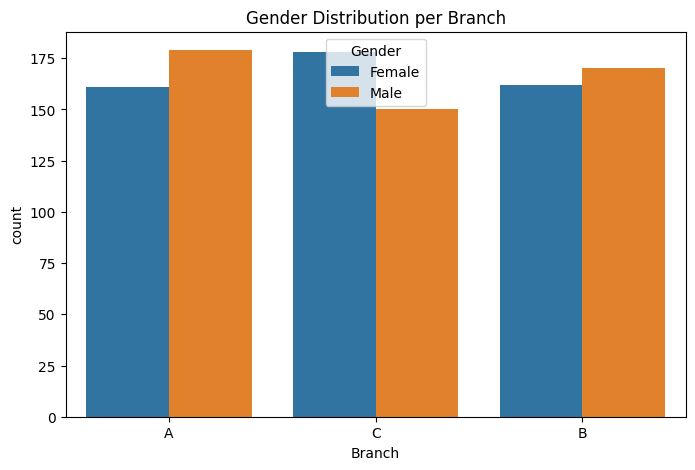

In [78]:
# Group by branch and gender to count occurrences
gender_per_branch = df.groupby(['Branch', 'Gender']).size().reset_index(name='count')

# Plot count plot
plt.figure(figsize=(8, 5))
sns.countplot(x='Branch', hue='Gender', data=df)
plt.title('Gender Distribution per Branch')
plt.show()

### 7. Which time of the day do customers give most ratings?

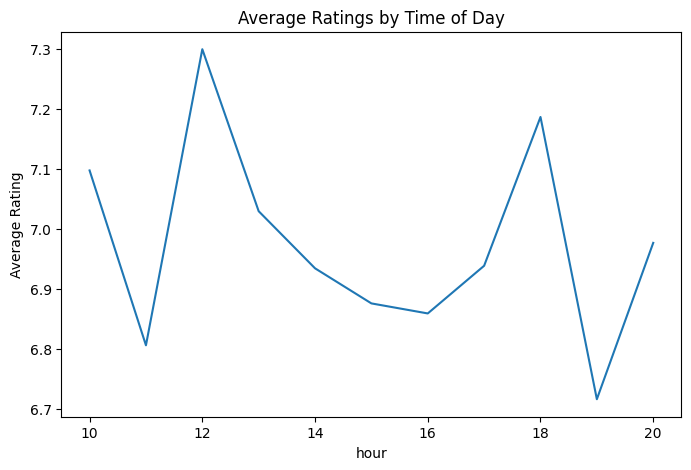

In [79]:
# Group by hour and calculate the average rating
ratings_by_hour = df.groupby('hour')['Rating'].mean().reset_index()

# Plot line chart
plt.figure(figsize=(8, 5))
sns.lineplot(x='hour', y='Rating', data=ratings_by_hour)
plt.title('Average Ratings by Time of Day')
plt.ylabel('Average Rating')
plt.show()

### 8. Which time of the day do customers give most ratings per branch?

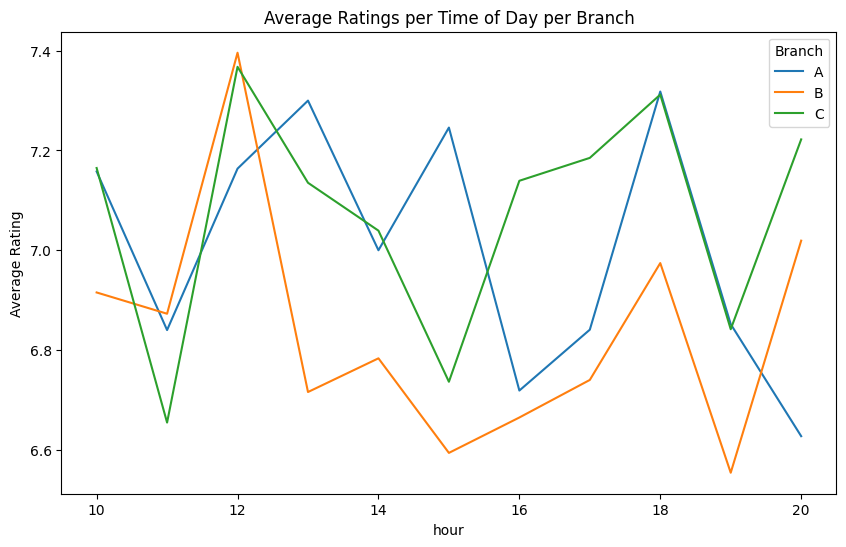

In [80]:
# Group by hour and branch to find average rating per branch at each hour
ratings_by_hour_branch = df.groupby(['hour', 'Branch'])['Rating'].mean().reset_index()

# Plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='Rating', hue='Branch', data=ratings_by_hour_branch)
plt.title('Average Ratings per Time of Day per Branch')
plt.ylabel('Average Rating')
plt.show()

### 9. Which day fo the week has the best avg ratings?

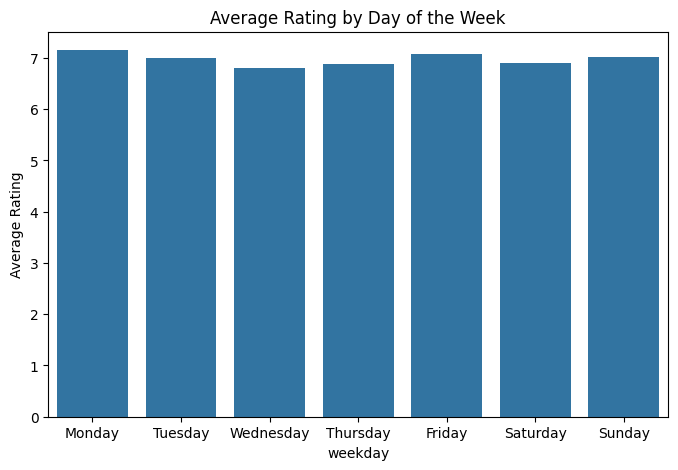

In [81]:
# Group by weekday and calculate the average rating
avg_rating_per_weekday = df.groupby('weekday')['Rating'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='weekday', y='Rating', data=avg_rating_per_weekday, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Average Rating by Day of the Week')
plt.ylabel('Average Rating')
plt.show()

### 10. Which day of the week has the best average ratings per branch?

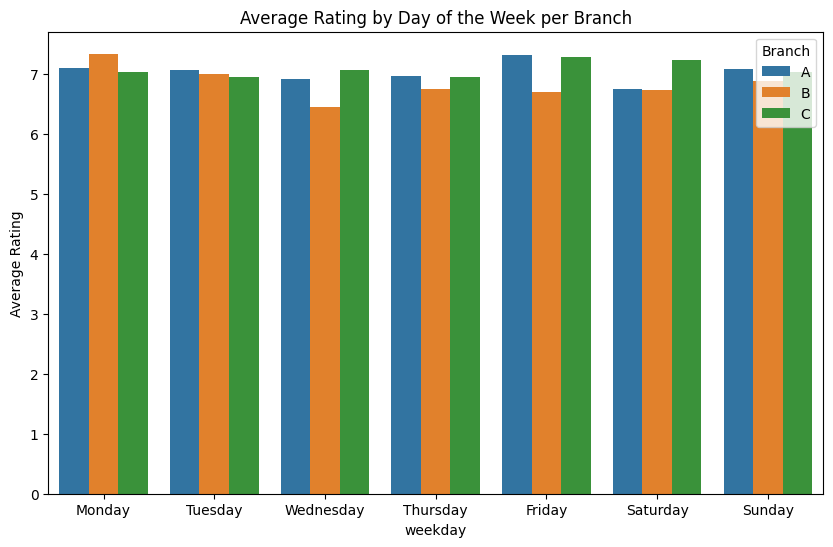

In [82]:
# Group by weekday and branch to find average rating per branch at each weekday
avg_rating_per_weekday_branch = df.groupby(['weekday', 'Branch'])['Rating'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='Rating', hue='Branch', data=avg_rating_per_weekday_branch, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Average Rating by Day of the Week per Branch')
plt.ylabel('Average Rating')
plt.show()